In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from interval_model import *

fname = "..\\..\\data\\CVRPTW\\solomon_25\\R101.json"

tlim = 10

cvrptw_prob = CVRPTW()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

best_known_solution: 828.94
num_cust= 25
num_vehicles= 25
n= 75
len(vrp.distance_matrix)=  75
vrp.distance_matrix[0]=  [0, 325, 145, 322, 322, 248, 210, 315, 178, 155, 264, 166, 264, 468, 453, 424, 407, 228, 282, 164, 292, 392, 461, 277, 376, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152]
vrp.distance_matrix[1]=  [325, 0, 344, 202, 238, 164, 362, 360, 474, 432, 502, 234, 94, 211, 130, 251, 326, 274, 474, 490, 104, 122, 233, 349, 301, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
vrp.distance_matrix[2]=  [145, 344, 0, 250, 427, 335, 353, 450, 150, 291, 403, 111, 320, 531, 471, 514, 522, 

{'LogPeriod': 100000, 'LogVerbosity': 'Terse'}

In [20]:
solution = model.solve(TimeLimit=tlim)

C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/intervalmodel.py:168(stream:2292:1): Warning: Constraint 'span': master interval variable 'T0' is optional but spanned interval 'V25_0' is present.
                                                                                                                                                                                              span(T0, [V0_0, V1_0, V2_0, V3_0, V4_0, V5_0, V6_0, V7_0, V8_0, V9_0, V10_0, V11_0, V12_0, V13_0, V14_0, V15_0, V16_0, V17_0, V18_0, V19_0, V20_0, V21_0, V22_0, V23_0, V24_0, V25_0, V26_0, V27_0, V28_0, V29_0, V30_0, V31_0, V32_0, V33_0, V34_0, V35_0, V36_0, V37_0, V38_0, V39_0, V40_0, V41_0, V42_0, V43_0, V44_0, V45_0, V46_0, V47_0, V48_0, V49_0, V50_0, V51_0, V52_0, V53_0, V54_0, V55_0, V56_0, V57_0, V58_0, V59_0, V60_0, V61_0, V62_0, V63_0, V64_0, V65_0, V66_0, V67_0, V68_0, V69_0, V70_0, V71_0, V72_0, V73_0, V74_0])
C

In [8]:
import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            if sol.presence != False and sol.size != 0:
                print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()


V19_14: (start=100, end=1000, size=900, length=900)
V19_14: (start=100, end=1000, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V3_16: (start=3867, end=4767, size=900, length=900)
V3

In [1]:
# convert sequence to path
paths = []
for solution in solutions:
    path = []
    for i in range(len(solution.lvars)):
        prdel = int(solution.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)


NameError: name 'solutions' is not defined

In [ ]:
ref_paths = instance['our_best_solution']
visualize_path(ref_paths, None, cvrptw_prob)

best_known_solution: 360.2
num_cust= 25
num_vehicles= 25
n= 75
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 1975 variables, 200 constraints
 ! TimeLimit            = 10
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.05s (0.05s extraction + 0.00s propagation)
 !  . Log search space  : 448.3 (before), 448.3 (after)
 !  . Memory usage      : 22.4 MB (before), 22.4 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0       1975                 -
 + New bound is 0
 *      1673.100     2832  0.34s        1      (gap is 100.0%)
 *      1654.500     2827  0.35s        2      (gap is 100.0%)
 *      1391.400     2825  0.35s        3      (gap is 100.0%)
 *      1352.800     6633  0.40s        1      (gap is 100.0%)
 *     

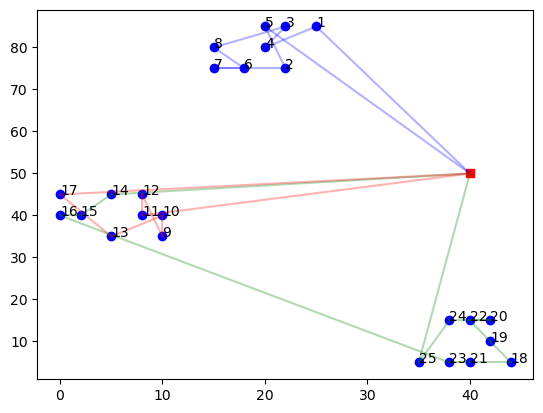

Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 403
Node 5 arrive 403 early 730 late 1930 start 730
Distance from 5 to 2 is 101
Node 2 arrive 931 early 1520 late 2720 start 1520
Distance from 2 to 7 is 70
Node 7 arrive 1690 early 3000 late 4200 start 3000
Distance from 7 to 6 is 30
Node 6 arrive 3130 early 3880 late 5080 start 3880
Distance from 6 to 8 is 58
Node 8 arrive 4038 early 3670 late 4870 start 4038
Distance from 8 to 3 is 86
Node 3 arrive 4224 early 4710 late 5910 start 4710
Distance from 3 to 4 is 53
Node 4 arrive 4863 early 6440 late 7640 start 6440
Distance from 4 to 1 is 70
Node 1 arrive 6610 early 6730 late 7930 start 6730
Distance from 1 to 0 is 380
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 14 is 353
Node 14 arrive 353 early 350 late 1550 start 353
Distance from 14 to 15 is 58
Node 15 arrive 511 early 1740 late 2940 start 1740
Distance from 15 to 16 is 20
Node 16 arrive 1860 early 2550 late 3750 start 2550
Distance from 16 to 23 is 516
Nod

In [2]:
from interval_model import *

fname = "..\\..\\data\\CVRPTW\\solomon_25\\RC201.json"

tlim = 10

cvrptw_prob = CVRPTW()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

solution = model.solve(TimeLimit=tlim)

import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            pass
            # if sol.presence != False and sol.size != 0:
            #     print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                # print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
                    print("found path", key)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()

# convert sequence to path
paths = []
for sol in solutions:
    path = []
    for i in range(len(sol.lvars)):
        prdel = int(sol.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    if path in paths:
        continue
    # path.reverse()
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)
validate_path(paths, cvrptw_prob)

360.2
4.64
[[0, 2, 5, 8, 7, 6, 3, 1, 4, 0], [0, 23, 21, 18, 19, 22, 20, 24, 0, 0], [0, 14, 12, 16, 15, 11, 9, 10, 13, 17, 0]]


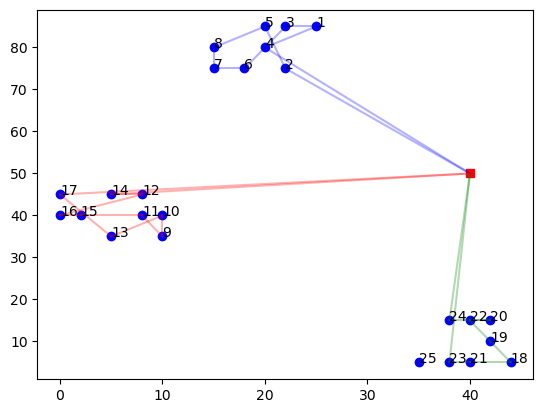

In [3]:
# instance['our_best_solution']['paths'][2][5] = 25
# validate_path(instance['our_best_solution'], cvrptw_prob)
ref_paths = instance['our_best_solution']
print(ref_paths['total_distance'])
print(ref_paths['search_progress'][-1][1])
print(ref_paths['paths'])
visualize_path(ref_paths, None, cvrptw_prob)

In [35]:
print(solution.solution['V7'])
print(solution.solution['TW7'])
print(solution.solution['V7_2'])
print(solution.solution['V11_2'])
print(solution.solution['V12_2'])
print(solution.solution['V7_2'])



IntervalVarValue(start=2028, end=2928, size=900)
IntervalVarValue(start=2550, end=4140, size=1590)
IntervalVarValue(start=2028, end=2928, size=900)
()
()
IntervalVarValue(start=2028, end=2928, size=900)


In [8]:
num_vehicles = num_cust = 25
n = num_cust + num_vehicles * 2

for vehicle in range(num_vehicles):
    i = num_cust + num_vehicles + vehicle
    idx = f'V{i}_{vehicle}'
    res = solution.solution[idx]
    print(idx, res)
    idx = f'R{vehicle}'
    res = solution.solution[idx]
    print(f'R{vehicle}', len(res), len(res)*90)


V50_0 IntervalVarValue(start=0, end=0, size=0)
R0 2 180
V51_1 IntervalVarValue(start=0, end=0, size=0)
R1 2 180
V52_2 IntervalVarValue(start=0, end=0, size=0)
R2 2 180
V53_3 IntervalVarValue(start=0, end=0, size=0)
R3 2 180
V54_4 IntervalVarValue(start=0, end=0, size=0)
R4 2 180
V55_5 IntervalVarValue(start=0, end=0, size=0)
R5 2 180
V56_6 IntervalVarValue(start=0, end=0, size=0)
R6 2 180
V57_7 IntervalVarValue(start=0, end=0, size=0)
R7 2 180
V58_8 IntervalVarValue(start=0, end=0, size=0)
R8 2 180
V59_9 IntervalVarValue(start=0, end=0, size=0)
R9 2 180
V60_10 IntervalVarValue(start=1017, end=1017, size=0)
R10 11 990
V61_11 IntervalVarValue(start=0, end=0, size=0)
R11 2 180
V62_12 IntervalVarValue(start=0, end=0, size=0)
R12 2 180
V63_13 IntervalVarValue(start=0, end=0, size=0)
R13 2 180
V64_14 IntervalVarValue(start=0, end=0, size=0)
R14 2 180
V65_15 IntervalVarValue(start=0, end=0, size=0)
R15 2 180
V66_16 IntervalVarValue(start=0, end=0, size=0)
R16 2 180
V67_17 IntervalVarValue(sta

In [19]:
temp = solution.solution['R21']


In [5]:
# from integer_model import *

instance = IntervalModel()
instance.read_json(fname)

print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
if instance.instance['best_known_solution'] is not None:
    print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
    print('prdel')
else:
    print('best_known_solution: None')

instance.solve(tlim)
instance.visualize_solution()
instance.visualize_progress()
instance.display_solution()
instance.validate_solution()


[autoreload of _pydevd_bundle.pydevd_frame failed: Traceback (most recent call last):
  File "C:\Users\micha\anaconda3\envs\optimizin\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\micha\anaconda3\envs\optimizin\lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
  File "C:\Users\micha\anaconda3\envs\optimizin\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 612, in _exec
  File "<frozen importlib._bootstrap>", line 556, in _init_module_attrs
  File "<frozen importlib._bootstrap>", line 397, in cached
  File "<frozen importlib._bootstrap_external>", line 513, in _get_cached
  File "<frozen importlib._bootstrap_external>", line 406, in cache_from_source
  File "<frozen importlib._bootstrap_external>", line 134, in _path_split
  File "<frozen importlib._bootstrap_external

num_cust= 25
num_vehicles= 25
n= 75
best_known_solution: 360.2
best_known_solution: 360.2
prdel
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 1975 variables, 200 constraints
 ! TimeLimit            = 10
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.05s (0.05s extraction + 0.00s propagation)
 !  . Log search space  : 448.3 (before), 448.3 (after)
 !  . Memory usage      : 22.4 MB (before), 22.4 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0       1975                 -
 + New bound is 0
 *      1673.100     2832  0.40s        1      (gap is 100.0%)
 *      1654.500     2827  0.40s        2      (gap is 100.0%)
 *      1391.400     2825  0.40s        3      (gap is 100.0%)
 *      1352.800     6633  0.48s     

TypeError: 'NoneType' object is not iterable